In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPooling2D,AvgPool2D,GlobalAveragePooling2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

2024-05-22 01:55:10.100981: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-22 01:55:10.101103: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-22 01:55:10.276959: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
#Please run this notebook in a Kaggle environment with GPU. First load this dataset in the input - https://www.kaggle.com/datasets/itsshuvra/gender-classified-dataset-with-masked-face
path1 = "/kaggle/input/gender-classified-dataset-with-masked-face/GenderOcclusionData/Training/female"  
path2 = "/kaggle/input/gender-classified-dataset-with-masked-face/GenderOcclusionData/Training/male"
pixels = []
gender = [] 
for img in os.listdir(path1):
  img = cv2.imread(str(path1)+"/"+str(img))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img=cv2.resize(img,(100,100))
  pixels.append(np.array(img))
  gender.append(0)
for img in os.listdir(path2):
  img = cv2.imread(str(path2)+"/"+str(img))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img=cv2.resize(img,(100,100))
  pixels.append(np.array(img))
  gender.append(1)
pixels = np.array(pixels)
gender = np.array(gender)

x_train,x_test,y_train,y_test = train_test_split(pixels,gender, test_size = 0.2,random_state=100)

In [5]:
y_train.shape

(57854,)

In [6]:
y_train.sum()

27957

In [7]:
y_test.shape

(14464,)

In [8]:
y_test.sum()

7058

In [9]:
# CNN Architecture


input = Input(shape = (100,100,1))
conv1 = Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2)) (conv1)
conv2 = Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2)) (conv2)
conv3 = Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2)) (conv3)
conv4 = Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size = (2,2)) (conv4)
flatten = Flatten()(pool4)
dense_1 = Dense(128,activation='relu')(flatten)
drop_1 = Dropout(0.2)(dense_1)
output = Dense(2,activation="sigmoid")(drop_1)

# Model compile
model = Model(inputs=input,outputs=output)
model.compile(optimizer="adam",loss=["sparse_categorical_crossentropy"],metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,567,874 (5.98 MB)

 Trainable params: 1,567,874 (5.98 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tqdm.keras import TqdmCallback

model_path = './output/gender_model_epoch_{epoch:02d}.keras'
checkpointer = ModelCheckpoint(model_path, monitor='loss', verbose=1, save_best_only=False,
                               save_weights_only=False, mode='auto', save_freq='epoch')
callback_list = [checkpointer, TqdmCallback()]

# Model training with progress bar
save = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, callbacks=callback_list)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/30
   7/1808 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.5053 - loss: 49.5811 

I0000 00:00:1716343355.225543     133 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716343355.247581     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1808/1808 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7392 - loss: 1.5837

W0000 00:00:1716343389.935315     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716343391.766086     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: saving model to ./output/gender_model_epoch_01.keras
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 51s 21ms/step - accuracy: 0.7393 - loss: 1.5832 - val_accuracy: 0.8809 - val_loss: 0.4049
Epoch 2/30
1805/1808 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8853 - loss: 0.3860
Epoch 2: saving model to ./output/gender_model_epoch_02.keras
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8853 - loss: 0.3860 - val_accuracy: 0.8943 - val_loss: 0.3431
Epoch 3/30
1805/1808 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9014 - loss: 0.3246
Epoch 3: saving model to ./output/gender_model_epoch_03.keras
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9014 - loss: 0.3246 - val_accuracy: 0.9114 - val_loss: 0.2874
Epoch 4/30
1805/1808 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9075 - loss: 0.2928
Epoch 4: saving model to ./output/gender_model_epoch_04.keras
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9075 - loss: 0.2928 - val_accuracy: 0.9123 - val_loss: 0.2829


Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

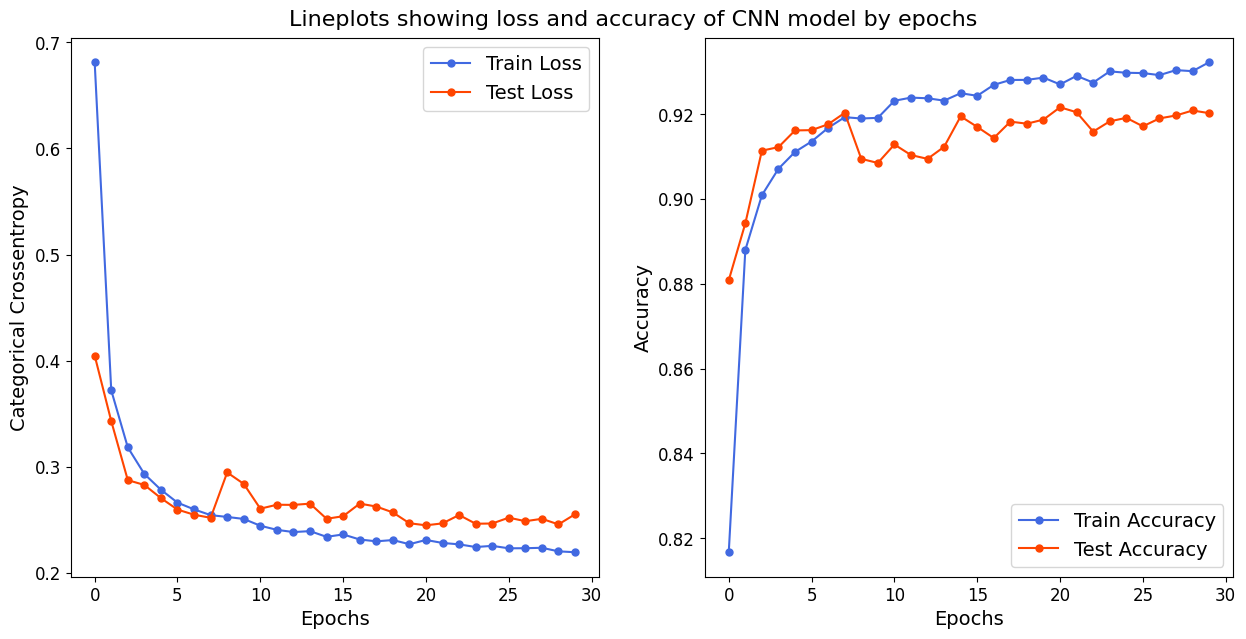

In [11]:
# We check the train loss and accuracy values from the neural network above.
train_loss = save.history['loss']
test_loss = save.history['val_loss']
train_accuracy = save.history['accuracy']
test_accuracy = save.history['val_accuracy']

# We plot a line chart to visualize the loss and accuracy values by epochs.
fig, ax = plt.subplots(ncols=2, figsize=(15,7))
ax = ax.ravel()
ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)
ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)
ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)
ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)
ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)
ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)
fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)


In [12]:
test_accuracy

[0.8808766603469849,
 0.8942892551422119,
 0.9114353060722351,
 0.9122649431228638,
 0.9162057638168335,
 0.916274905204773,
 0.9176576137542725,
 0.9203540086746216,
 0.90949946641922,
 0.9085315465927124,
 0.9128871560096741,
 0.9103982448577881,
 0.90949946641922,
 0.9123340845108032,
 0.9195243120193481,
 0.9170354008674622,
 0.9144082069396973,
 0.9182798862457275,
 0.9177958965301514,
 0.9187638163566589,
 0.9216675758361816,
 0.9204922318458557,
 0.9159291982650757,
 0.918349027633667,
 0.9191786646842957,
 0.9171736836433411,
 0.9190403819084167,
 0.9197317361831665,
 0.9209070801734924,
 0.9202848672866821]

In [13]:
max(test_accuracy)

0.9216675758361816

In [14]:
idx = test_accuracy.index(max(test_accuracy))
idx

20

In [15]:
from tensorflow.keras.models import load_model
model_path = f'./output/gender_model_epoch_{(idx+1)}.keras'
# Load the best model
best_model = load_model(model_path)

# Evaluate the model on the validation data
loss, accuracy = best_model.evaluate(x_test, y_test)

# Print the accuracy
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

 32/452 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9471 - loss: 0.2084

W0000 00:00:1716344148.733291     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9250 - loss: 0.2397
Validation Accuracy: 92.17%


This is the final validation accuracy of our best model

In [16]:
from IPython.display import FileLink

# Create a link to download the file
FileLink(f'./output/gender_model_epoch_{(idx+1)}.keras') #Download the link below of the best model

/kaggle/working/output/gender_model_epoch_21.keras